<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/MLProject_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math
from PIL import Image

# **Question 1**

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Question 2**

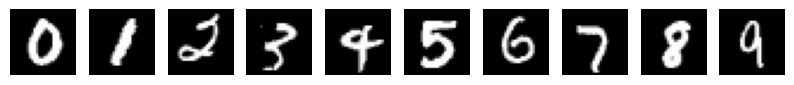

In [4]:
digit_list = list(range(10))
ind_list = []

for d in digit_list:
    d_index = np.where(y_train == d)[0]
    index = np.random.choice(d_index)
    ind_list.append(index)

plt.figure(figsize=(10,2))
for i, ind in enumerate(ind_list):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[ind], cmap='gray')
    plt.axis('off')
plt.show()

# **Question 3**

In [5]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


As we can see, the size of the picture is 28x28 pixels. Not all pixels are equally important. Especially pixels near the edges are always black, so they do not carry any information about the shape of a digit.

# **Question 4**

In [6]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("x_train_flat shape:", x_train_flat.shape)
print("x_test_flat shape:", x_test_flat.shape)

x_train_flat shape: (60000, 784)
x_test_flat shape: (10000, 784)


# **Question 5**

Train accuracy: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracy: [0.9688, 0.9633, 0.9533, 0.9241]


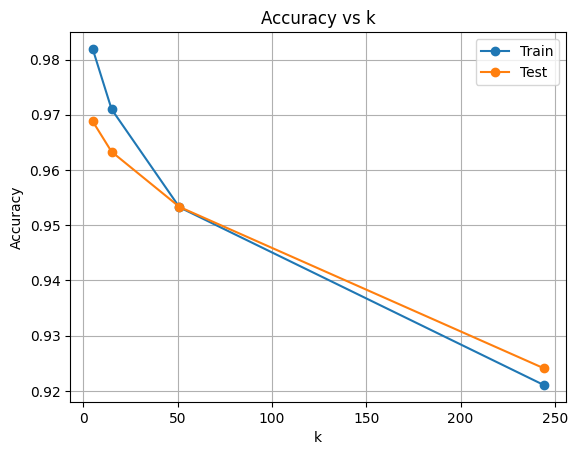

In [7]:
k_list = [5, 15, 51, int(math.sqrt(x_train.shape[0]))]

acc_train = []
acc_test = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    y_pred_train = knn.predict(x_train_flat)
    y_pred_test = knn.predict(x_test_flat)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

print("Train accuracy:", acc_train)
print("Test accuracy:", acc_test)

plt.figure()
plt.plot(k_list, acc_train, marker='o', label='Train')
plt.plot(k_list, acc_test, marker='o', label='Test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.legend()
plt.grid(True)
plt.show()

# **Question 6**

Train accuracy (scaled): [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracy (scaled): [0.9688, 0.9633, 0.9533, 0.9241]


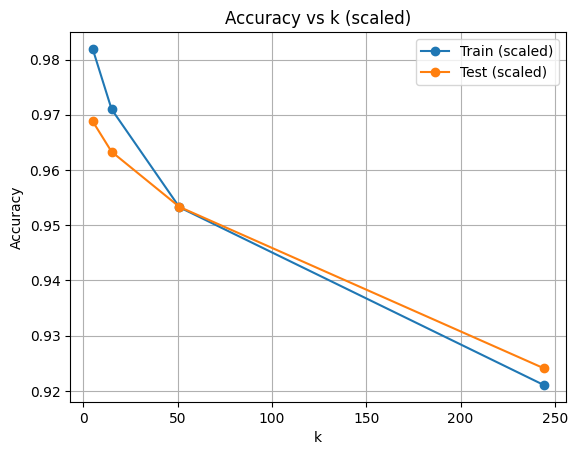

In [11]:
x_train_scaled = x_train.astype('float32') / 255
x_test_scaled = x_test.astype('float32') / 255

acc_train_scaled = []
acc_test_scaled = []
knn_scaled = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled.reshape(x_train_scaled.shape[0], -1), y_train)
    y_pred_train = knn.predict(x_train_scaled.reshape(x_train_scaled.shape[0], -1))
    y_pred_test = knn.predict(x_test_scaled.reshape(x_test_scaled.shape[0], -1))
    acc_train_scaled.append(accuracy_score(y_train, y_pred_train))
    acc_test_scaled.append(accuracy_score(y_test, y_pred_test))
    knn_scaled.append(knn)

print("Train accuracy (scaled):", acc_train_scaled)
print("Test accuracy (scaled):", acc_test_scaled)

plt.figure()
plt.plot(k_list, acc_train_scaled, marker='o', label='Train (scaled)')
plt.plot(k_list, acc_test_scaled, marker='o', label='Test (scaled)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (scaled)')
plt.legend()
plt.grid(True)
plt.show()


In KNN with Euclidean distance, if we divde all pixel values by 255 is like multipling all distances with 1/255. Although it scales all distances, it does not change their order. Therefore, we have the same nearest neighbors. So, prediction and accurace should be the same too.

# **Question 7**

In [12]:
img = Image.open('digit.png')
img = img.convert('L')
img = img.resize((28, 28))
img_array = np.array(img).astype('float32')/255
img_flat = img_array.reshape(1,-1)

best_ind = np.argmax(acc_test_scaled)
best_k = k_list[best_ind]
best_knn = knn_scaled[best_ind]
best_knn.predict(img_flat)
predicted_digit = best_knn.predict(img_flat)

print("Best k:", best_k)
print("Digit Predicted:", predicted_digit)

Best k: 5
Digit Predicted: [7]
